Questão 05

In [1]:
def search(vetor, valor):
    result = -1
    for i in range(len(vetor)):
        if vetor[i] == valor:
            result = i
    return result

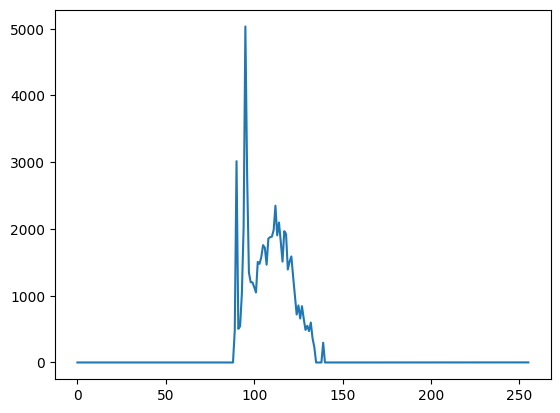

In [3]:
from PIL import Image
import matplotlib.pyplot as plt

def main():
    soma = 0
    imagem = Image.open("Ativ.Pratica.01/image1.png")

    width1, height1 = imagem.size
    hist_imagem = [0 for _ in range(256)]
    f = [0 for _ in range(256)]

    for i in range(width1):
        for j in range(height1):
            hist_imagem[imagem.getpixel((i, j))] += 1 / (width1 * height1)
            
    for k in range(256):
        soma += hist_imagem[k]
        f[k] += int(255 * soma)

    soma = 0
    especificao = Image.open("Ativ.Pratica.01/lena_gray.bmp")

    width2, height2 = especificao.size

    hist_especificao = [0 for _ in range(256)]
    g = [0 for _ in range(256)]

    for i in range(width2):
        for j in range(height2):
            hist_especificao[especificao.getpixel((i, j))] += 1 / (width2 * height2)

    for k in range(256):
        soma += hist_especificao[k]
        g[k] = int(255 * soma)

    lut = [0 for _ in range(256)]

    for k in range(256):
        while search(g, f[k]) == -1:
            f[k] -= 1
        lut[k] = search(g, f[k])

    hist_imagem = [0 for _ in range(256)]

    for i in range(width1):
        for j in range(height1):
            imagem.putpixel((i, j), lut[imagem.getpixel((i, j))])
            hist_imagem[imagem.getpixel((i, j))] += 1

    imagem.save("image1_especificada.png")
    plt.plot(hist_imagem)


if __name__ == "__main__":
    main()